In [6]:
library(ggplot2)
library(dplyr)
library(ggmap)
library(maps)
library(mapdata)
library(lubridate)
options(jupyter.plot_mimetypes = 'image/png')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Google Maps API Terms of Service: http://developers.google.com/maps/terms.
Please cite ggmap if you use it: see citation("ggmap") for details.

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [7]:
path <- "./google_transit"
extension <- ".txt"

In [29]:
stopEdge_shapePts <- read.csv(file=file.path(path, paste("stopEdge_shapePts", extension, sep="")), header=T)
shape_stopEdge <- read.csv(file=file.path(path, paste("shape_stopEdge", extension, sep="")), header=T)
shapes <- read.csv(file=file.path(path, paste("shapes", extension, sep="")), header=T)
trip_idTOshape_id <- read.csv(file=file.path(path, paste("trip_idTOshape_id", extension, sep="")), header=T)
stop_times <- read.csv(file=file.path(path, paste("stop_times", extension, sep="")), header=T)
stops <- read.csv(file=file.path(path, paste("stops", extension, sep="")), header=T)

In [45]:
shape_id_test =  '202_8_22'
shape_stop_edge_test <- shape_stopEdge[shape_stopEdge$shape_id ==  shape_id_test,]
stop_edge_list_test <- shape_stop_edge_test$stop_edge_id

trip_id_test <- trip_idTOshape_id[trip_idTOshape_id$shape_id == shape_id_test,]$trip_id[[1]]
stops_list_test <- stop_times[stop_times$trip_id == trip_id_test,]
stops_test <- merge(stops_list_test, stops)

In [10]:
stopEdge_shapePts_test <- filter(stopEdge_shapePts, stop_edge_id %in% stop_edge_list_test)

In [13]:
bbox <- 0.25
bbox <- make_bbox(lon = stopEdge_shapePts_test$shape_pt_lon, lat = stopEdge_shapePts_test$shape_pt_lat, f = bbox)
sq_map <- get_map(location = bbox, maptype = "roadmap", source = "google")

Warning message:
“bounding box given to google - spatial extent only approximate.”converting bounding box to center/zoom specification. (experimental)
Source : https://maps.googleapis.com/maps/api/staticmap?center=32.87185,-117.2265&zoom=15&size=640x640&scale=2&maptype=roadmap&language=en-EN


In [54]:
stop_edge_test_path_plot <- geom_path(data = stopEdge_shapePts_test,
                                      mapping = aes(x = shape_pt_lon, y = shape_pt_lat, colour=stop_edge_id), 
                                      alpha = 0.9, size = 2, show.legend = F)

stops_test_plot = geom_point(data = stops_test,
                             mapping = aes(x = stop_lon, y = stop_lat), 
                             color="black", alpha = 0.5, size = 5, show.legend = F)

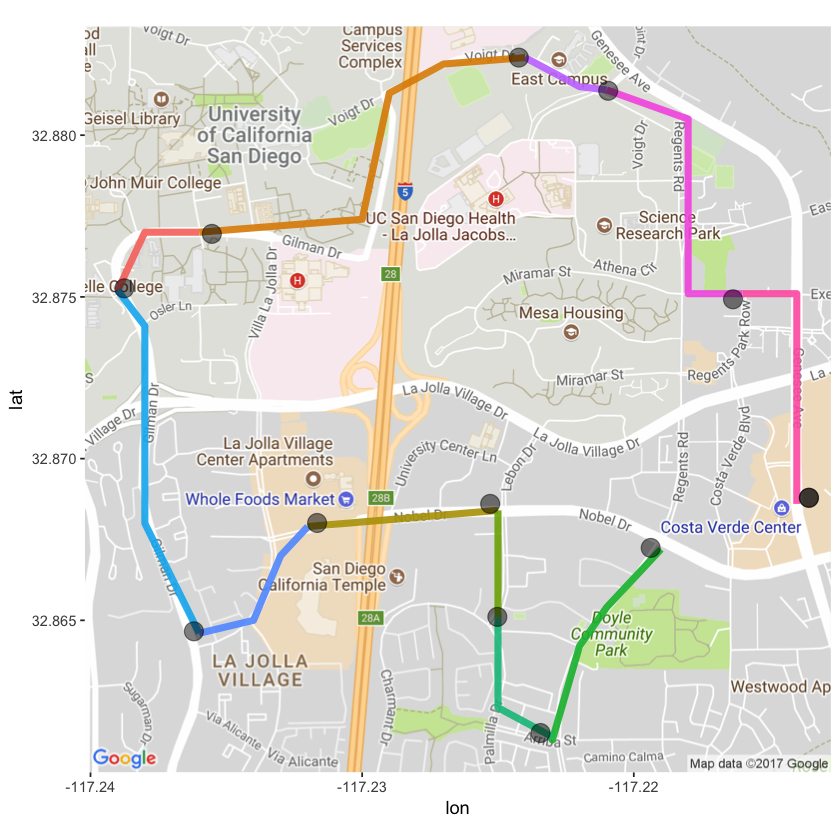

In [55]:
ggmap(sq_map) + stop_edge_test_path_plot + stops_test_plot

In [57]:
shapes_plot <- geom_point(data = shapes,
                           mapping = aes(x = shape_pt_lon, y = shape_pt_lat, colour=shape_id), 
                           alpha = 0.2, size = 2, show.legend = F)

Warning message:
“Removed 120722 rows containing missing values (geom_point).”

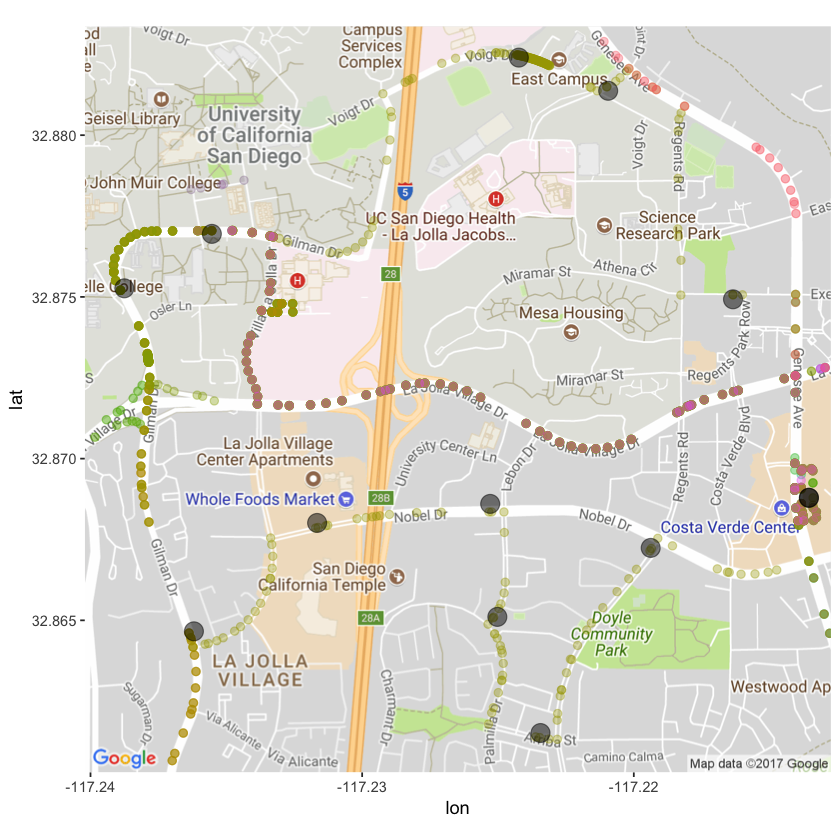

In [58]:
ggmap(sq_map) + shapes_plot + stops_test_plot

In [60]:
shapes_test <- shapes[shapes$shape_id == shape_id_test,]
shapes_test_plot <- geom_point(data = shapes_test,
                           mapping = aes(x = shape_pt_lon, y = shape_pt_lat, colour=shape_id), 
                           alpha = 0.9, size = 2, show.legend = F)

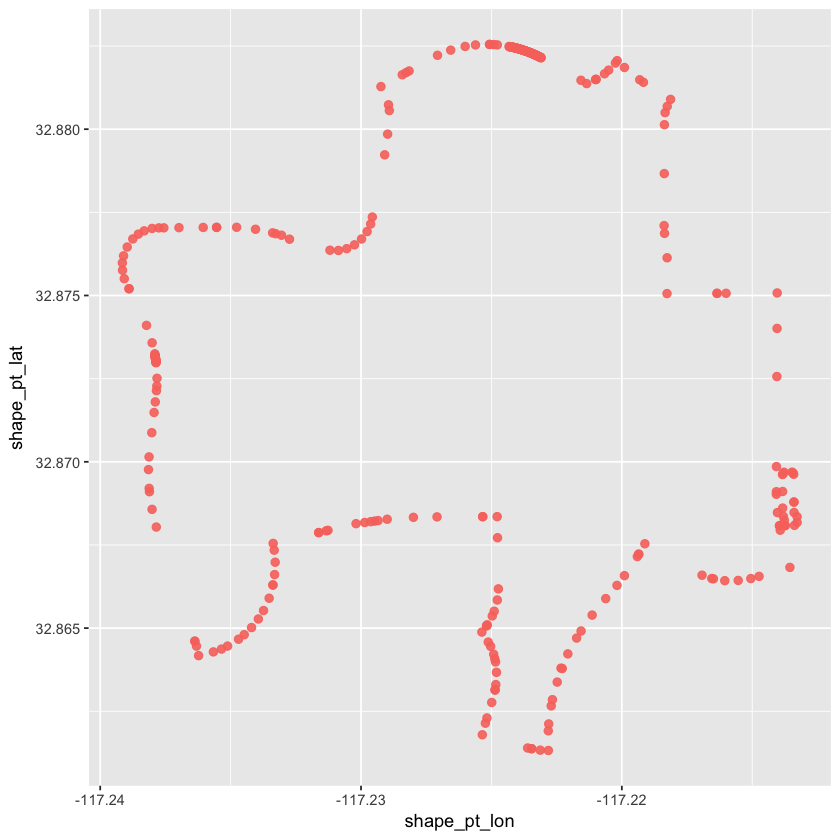

In [69]:
ggplot() + shapes_test_plot

In [64]:
stop_edge_test_path_points_plot <- geom_point(data = stopEdge_shapePts_test,
                                              mapping = aes(x = shape_pt_lon, y = shape_pt_lat, colour=stop_edge_id), 
                                              alpha = 0.9, size = 2, show.legend = F)

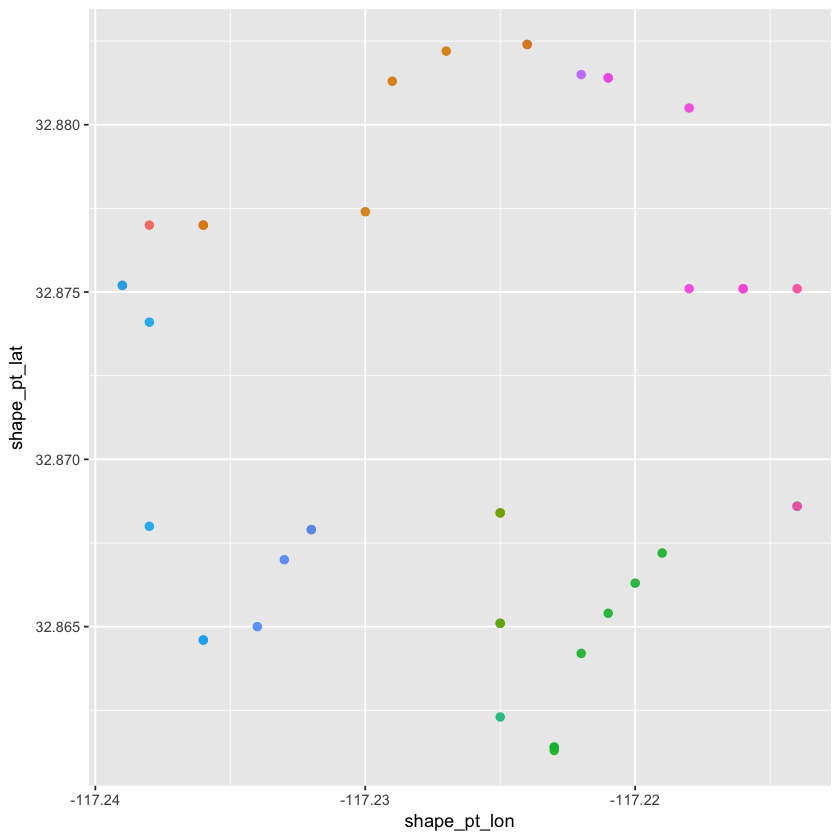

In [68]:
ggplot() + stop_edge_test_path_points_plot